## II - Synthèse à partir du continu par la transformation bilinéaire
---

On désire adapter un filtre du second ordre continu de la forme 

$G(p) = \frac{\omega_n^2}{p^2+ 2\zeta\omega_n\,p+{\omega_n}^2}$





Transfer function 'second' from input 'u1' to output ...

             3.948e+07        
 y1:  ------------------------
      s^2 + 1257 s + 3.948e+07

Continuous-time model.


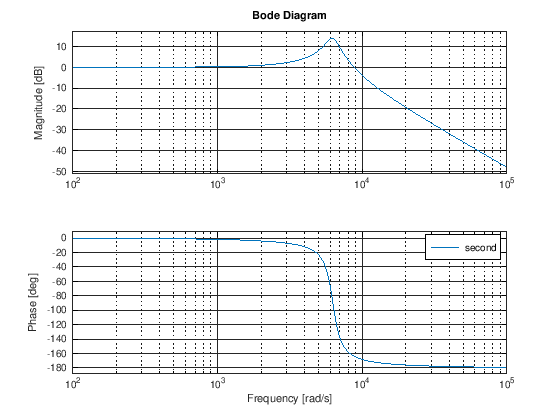

In [18]:
wn=1000*2*pi;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
bode(second)

Pour cela nous approchons l'opérateur dérivé par les 3 forme de différentiateurs étudiés précédemment.

Calculez analytiquement les fonctions de transfert par substituion de l'opérateur p en système discret :
- $G_f(z)=G\left(p=\frac{1-z^{-1}}{T_e}\right)$
- $G_b(z)=G\left(p=\frac{z-1}{T_e}\right)$
- $G_t(z)=G\left(p=\frac{2}{T_e}\frac{z-1}{z+1}\right)$

Effectuez les vérifications :
- pour $\omega=0$, en remplaçant z par 1 ($z=e^0=1$) on doit avoir $G_i(z=1)=G(f=0)=1$, car on sait que l'approximation fonctionne pour $\omega << F_e/2$
- les coefficients doivent être homogènes en dimension (p ~ $\omega$ et z est sans dimention)

Donnez l'équation aux différences de chacun de ces systèmes et vérifiez l'homogénéité des coefficients.

On peut vérifier numériquement les résultats pour la transformée bilinéaire qui peut être calculée avec la commande "c2d" pour "continuous to discrete".


Transfer function 'second' from input 'u1' to output ...

              3948        
 y1:  --------------------
      s^2 + 12.57 s + 3948

Continuous-time model.

Transfer function 'Gt' from input 'u1' to output ...

      0.08497 z^2 + 0.1699 z + 0.08497
 y1:  --------------------------------
           z^2 - 1.552 z + 0.8918     

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gf' from input 'u1' to output ...

        0.1833 z + 0.1757   
 y1:  ----------------------
      z^2 - 1.523 z + 0.8819

Sampling time: 0.01 s
Discrete-time model.


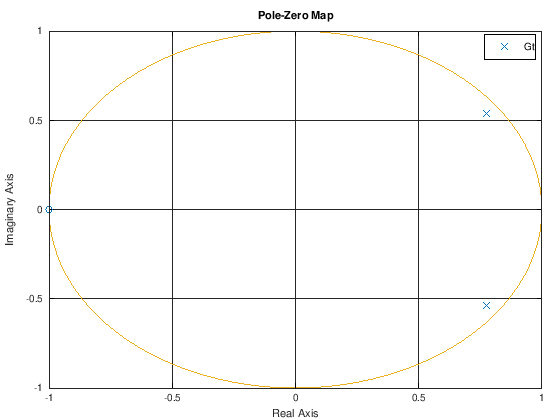

In [22]:
wn=2*pi*10;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
Fe=100;Te=1/Fe;
Gt=c2d(second,Te,'bilinear')
Gf=c2d(second,Te,'zoh')
pzmap(Gt); hold on;
z=exp(i*2*pi*(0:1:100)/100);
plot(real(z),imag(z))

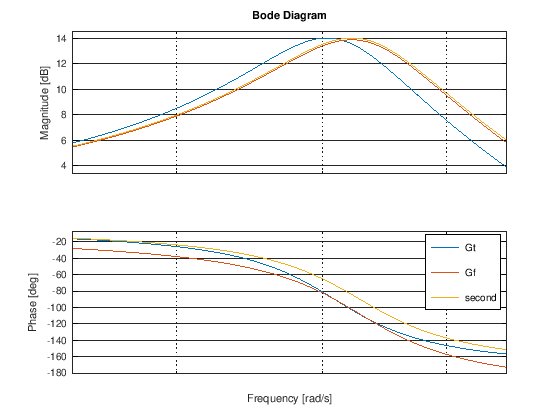

In [20]:
bode(Gt,Gf,second,W=2*pi*(7:0.01:12))